In [1]:
#Importamos la librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leemos el archivo
datos_df = pd.read_csv("vid18_180219.dat",delimiter=',', sep='\s+')

In [3]:
#Creamos un DataFrame con los valores del archivo
df = pd.DataFrame(datos_df)
df.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [4]:
#Filtramos los valores con los que deseamos trabajar y los introducimos en un nuevo DataFrame
val_df = df.filter(['TIMESTAMP','AirTC_Avg'],axis=1)
val_df.head()

,TIMESTAMP,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [5]:
#Creamos una columna para la fecha como variable date
val_df['FECHA'] = pd.to_datetime(val_df.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
val_df = val_df.drop(['TIMESTAMP'], 1)
val_df.head()

,AirTC_Avg,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
#Creamos una nueva columna para la hora, el día, el mes y el año respectivamente
val_df['HORA']= val_df['FECHA'].dt.hour
val_df['DÍA'] = val_df['FECHA'].dt.day
val_df['MES'] = val_df['FECHA'].dt.month
val_df['AÑO'] = val_df['FECHA'].dt.year
val_df.head()

,AirTC_Avg,FECHA,HORA,DÍA,MES,AÑO
0,23.50,2018-05-11 20:10:00,20,11,5,2018
1,22.96,2018-05-11 20:20:00,20,11,5,2018
2,22.73,2018-05-11 20:30:00,20,11,5,2018
3,22.40,2018-05-11 20:40:00,20,11,5,2018
4,22.46,2018-05-11 20:50:00,20,11,5,2018


In [7]:
#Filtramos nuestros datos a partir de la fecha 2018-11-11
uf_df = pd.DataFrame(val_df[val_df['FECHA']>="2018-11-1"])
uf_df = uf_df.reset_index(drop=True)
uf_df.head()

,AirTC_Avg,FECHA,HORA,DÍA,MES,AÑO
0,9.13,2018-11-01 00:00:00,0,1,11,2018
1,8.89,2018-11-01 00:10:00,0,1,11,2018
2,8.66,2018-11-01 00:20:00,0,1,11,2018
3,8.52,2018-11-01 00:30:00,0,1,11,2018
4,8.47,2018-11-01 00:40:00,0,1,11,2018


In [8]:
#Identificamos nuestros tipos de variables
uf_df.dtypes

AirTC_Avg           float64
FECHA        datetime64[ns]
HORA                  int64
DÍA                   int64
MES                   int64
AÑO                   int64
dtype: object

In [9]:
#Agrupamos los datos por hora y obtenemos su promedio, así como su temperatura máxima y mínima 
uf_df["TPROM"] = round(uf_df.groupby(['AÑO','MES','DÍA','HORA']).transform(np.mean),1)    #Promedio por hora
uf_df["TMAX"] = round(uf_df.groupby(["AÑO","MES","DÍA"])["TPROM"].transform(np.max),1)    #Temperatura máxima por hora
uf_df["TMIN"] = round(uf_df.groupby(["AÑO","MES","DÍA"])["TPROM"].transform(np.min),1)    #Temperatura mínima por hora
uf_df.head()

,AirTC_Avg,FECHA,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN
0,9.13,2018-11-01 00:00:00,0,1,11,2018,8.7,28.6,6.8
1,8.89,2018-11-01 00:10:00,0,1,11,2018,8.7,28.6,6.8
2,8.66,2018-11-01 00:20:00,0,1,11,2018,8.7,28.6,6.8
3,8.52,2018-11-01 00:30:00,0,1,11,2018,8.7,28.6,6.8
4,8.47,2018-11-01 00:40:00,0,1,11,2018,8.7,28.6,6.8


In [10]:
#Elíminamos nuestra variable de fecha y la temperatura del aire promedio
uf_df = uf_df.drop(['FECHA'],1)
uf_df = uf_df.drop(['AirTC_Avg'],1)

In [11]:
#Elíminamos los duplicados de manera que nos quedamos solamente con los datos por hora
uf_df = uf_df.drop_duplicates(subset=["HORA","DÍA","MES","AÑO"])  #Elíminamos los datos duplicados
uf_df = uf_df.reset_index(drop=True)                              #Reiniciamos el índice
uf_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN
0,0,1,11,2018,8.7,28.6,6.8
1,1,1,11,2018,8.5,28.6,6.8
2,2,1,11,2018,8.7,28.6,6.8
3,3,1,11,2018,8.8,28.6,6.8
4,4,1,11,2018,7.4,28.6,6.8


In [12]:

#Creamos un arreglo para almacenar los valores de Unidades de Frío (UF)
UF  = []
for i in range (0,len(uf_df)):
        if (uf_df['TPROM'][i] <= 1.4):
            UF.append(0)
        elif (1.5 <= uf_df['TPROM'][i] <= 2.4):
            UF.append(0.5)
        elif (2.5 <= uf_df['TPROM'][i] <= 9.1):
            UF.append(1.0)
        elif (9.2 <= uf_df['TPROM'][i] <= 12.4):
            UF.append(0.5)
        elif (12.5 <= uf_df['TPROM'][i] <= 15.9):
            UF.append(0)
        elif (16 <= uf_df['TPROM'][i] <= 18):
            UF.append(-0.5)
        elif (18 < uf_df['TPROM'][i]):
            UF.append(-1)

In [13]:
#Agregamos la columna de UF
uf_df["UF"] = UF
uf_df.tail()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF
2618,3,18,2,2019,5.4,6.8,3.4,1.0
2619,4,18,2,2019,4.7,6.8,3.4,1.0
2620,5,18,2,2019,4.2,6.8,3.4,1.0
2621,6,18,2,2019,3.7,6.8,3.4,1.0
2622,7,18,2,2019,3.4,6.8,3.4,1.0


In [14]:
#Calculamos las unidades de frío acumuladas por día
uf_df["UF24"] = uf_df.groupby(['AÑO','MES','DÍA'])["UF"].transform("sum")    #Suma de unidades de frío por día

In [15]:
#Creamos un nuevo DataFrame que maneje los datos por día; es decir, cada 24 horas
uf24_df = pd.DataFrame(uf_df.drop_duplicates(['AÑO','MES','DÍA']))
uf24_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF,UF24
0,0,1,11,2018,8.7,28.6,6.8,1.0,-0.5
24,0,2,11,2018,10.6,31.0,10.2,0.5,-9.0
48,0,3,11,2018,12.5,30.0,10.5,0.0,-9.5
72,0,4,11,2018,12.7,31.2,11.7,0.0,-11.5
96,0,5,11,2018,13.9,31.1,11.4,0.0,-8.0


In [16]:
#Eliminamos las columnas de horas y de UF
uf24_df = uf24_df.drop(['HORA'],1)
uf24_df = uf24_df.drop(['UF'],1)

In [17]:
#Reiniciamos nuestro índice
uf24_df = uf24_df.reset_index(drop=True)
uf24_df.head()

,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF24
0,1,11,2018,8.7,28.6,6.8,-0.5
1,2,11,2018,10.6,31.0,10.2,-9.0
2,3,11,2018,12.5,30.0,10.5,-9.5
3,4,11,2018,12.7,31.2,11.7,-11.5
4,5,11,2018,13.9,31.1,11.4,-8.0


In [18]:
#Calculamos el valor de UF24 acumulado para todos los días
uf24_df['UF24TOT']=np.cumsum(uf24_df['UF24'])
uf24_df.head()

,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF24,UF24TOT
0,1,11,2018,8.7,28.6,6.8,-0.5,-0.5
1,2,11,2018,10.6,31.0,10.2,-9.0,-9.5
2,3,11,2018,12.5,30.0,10.5,-9.5,-19.0
3,4,11,2018,12.7,31.2,11.7,-11.5,-30.5
4,5,11,2018,13.9,31.1,11.4,-8.0,-38.5


In [19]:
#Llenamos arreglos de días y de valores a gráficar
iDIAS = 1                       #Contador de días inicial
DIAS = []                       #Arreglo que almacena el número de días
tmxDIAS = []                    #Arreglo que almacena la temperatura máxima para cada día
tmnDIAS = []                    #Arreglo que almacena la temperatura mínima para cada día
uf24DIAS = []                   #Arreglo que almacena la suma de unidades de frío para cada día 
uf24tot = []                    #Arreglo que almacena el total de unidades de frío
for i in range(0,len(uf24_df)):        #Ciclo for que indica la longitud de nuestros arreglos
    nDIAS = [iDIAS + i]                 #Día i-ésimo
    DIAS.append(nDIAS)                  #Almacenamos el valor en nuestro arreglo
    ntmxDIAS = [uf24_df['TMAX'][i]]     #Temperatura máxima del día i-ésimo
    tmxDIAS.append(ntmxDIAS)            #Almacenamos el valor en nuestro arreglo
    ntmnDIAS = [uf24_df['TMIN'][i]]     #Temperatura mínima del día i-ésimo
    tmnDIAS.append(ntmnDIAS)            #Almacenamos el valor en nuestro arreglo
    nuf24DIAS = [uf24_df['UF24'][i]]    #Suma de las unidades de frío del día i-ésimo
    uf24DIAS.append(nuf24DIAS)          #Almacenamos el valor en nuestro arreglo
    nuf24tot = [uf24_df['UF24TOT'][i]]  #Valores acumulados de UF24
    uf24tot.append(nuf24tot)

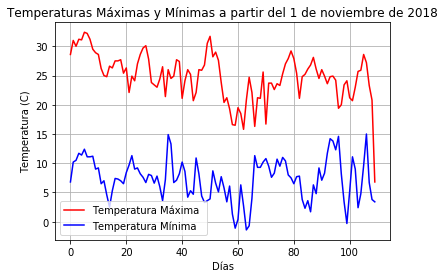

In [20]:
#Realizamos una gráfica que muestre la evolución temperatura máxima y mínima diaria
X = DIAS                 #Eje X
N = np.arange(len(DIAS)) #Longitud del arreglo de datos
Y1 = tmxDIAS             #Valores a graficar en eje Y (1)
Y2 = tmnDIAS             #Valores a graficar en eje Y (2)

plt.plot(Y1, label="Temperatura Máxima ", color = 'r')  #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Días")                                      #Nombre del eje X
plt.ylabel("Temperatura (C)")                           #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="Temperatura Mínima", color = 'b')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                            #Leyenda
plt.title('Temperaturas Máximas y Mínimas a partir del 1 de noviembre de 2018')  #Título de la gráfica
plt.savefig('tempsdias',plt=2000)                       #Guardamos la gráfica como una imágen
plt.show()                                              #Mostramos la gráfica

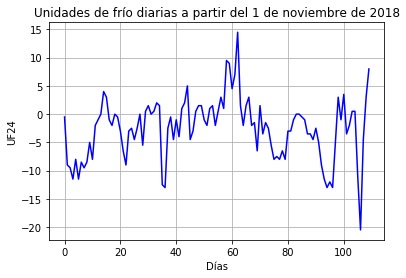

In [21]:
#Realizamos una gráfica que muestre la evolución de los valores UF24
X = DIAS                 #Eje X
N = np.arange(len(DIAS)) #Longitud del arreglo de datos
Y1 = uf24DIAS             #Valores a graficar en eje Y 

plt.plot(Y1, label="Unidades de Frío por día", color = 'b')  #Especficiaciones para graficar nuestros datos en Y 
plt.xlabel("Días")                                           #Nombre del eje X
plt.ylabel("UF24")                                           #Nombre del eje Y


plt.grid()
plt.title('Unidades de frío diarias a partir del 1 de noviembre de 2018')  #Título de la gráfica
plt.savefig('uf24dias',plt=2000)                                           #Guardamos la gráfica como una imágen
plt.show()                                                                 #Mostramos la gráfica

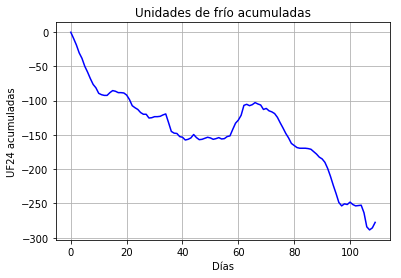

In [22]:
#Realizamos una gráfica que muestre la evolución de los valores UF24
X = DIAS                 #Eje X
N = np.arange(len(DIAS)) #Longitud del arreglo de datos
Y1 = uf24tot             #Valores a graficar en eje Y 

plt.plot(Y1, label="Unidades de Frío ", color = 'b')  #Especficiaciones para graficar nuestros datos en Y 
plt.xlabel("Días")                                    #Nombre del eje X
plt.ylabel("UF24 acumuladas")                         #Nombre del eje Y


plt.grid()
plt.title('Unidades de frío acumuladas')              #Título de la gráfica
plt.savefig('uf24tot',plt=2000)                       #Guardamos la gráfica como una imágen
plt.show()                                            #Mostramos la gráfica

In [23]:

#Creamos ahora un DataFrame para trabajar con el modelo de Grageda Grageda
gr_df = pd.DataFrame(uf_df)
gr_df = gr_df.drop(['UF'],1)
gr_df = gr_df.drop(['UF24'],1)
gr_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN
0,0,1,11,2018,8.7,28.6,6.8
1,1,1,11,2018,8.5,28.6,6.8
2,2,1,11,2018,8.7,28.6,6.8
3,3,1,11,2018,8.8,28.6,6.8
4,4,1,11,2018,7.4,28.6,6.8


In [24]:
#Creamos un arreglo para contar el número de horas frío (HF) y el número de horas caliente (HC) para calcular el número 
#de horas frío efectivas (HFE)
HF  = [] #Arreglo de horas frío
HC  = [] #Arreglo de horas caliente
for i in range (0,len(gr_df)):
        if ( gr_df['TPROM'][i] <= 0 ):
            HF.append(0)
            HC.append(0)
        elif ( 0 < gr_df['TPROM'][i] <= 10):
            HF.append(1)
            HC.append(0)
        elif (10 < gr_df['TPROM'][i] < 25):
            HF.append(0)
            HC.append(0)
        elif (25 <= gr_df['TPROM'][i]):
            HF.append(0)
            HC.append(1)

In [25]:
#Agregamos las columnas de HF y HC a nuestro DataFrame
gr_df["HF"] = HF
gr_df["HC"] = HC
gr_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN,HF,HC
0,0,1,11,2018,8.7,28.6,6.8,1,0
1,1,1,11,2018,8.5,28.6,6.8,1,0
2,2,1,11,2018,8.7,28.6,6.8,1,0
3,3,1,11,2018,8.8,28.6,6.8,1,0
4,4,1,11,2018,7.4,28.6,6.8,1,0


In [26]:
#Realizamos una sumatoria para obtener el número de HF y de HC para cada día
gr_df["HF24"] = gr_df.groupby(['AÑO','MES','DÍA'])["HF"].transform("sum") 
gr_df["HC24"] = gr_df.groupby(['AÑO','MES','DÍA'])["HC"].transform("sum") 
gr_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN,HF,HC,HF24,HC24
0,0,1,11,2018,8.7,28.6,6.8,1,0,8,6
1,1,1,11,2018,8.5,28.6,6.8,1,0,8,6
2,2,1,11,2018,8.7,28.6,6.8,1,0,8,6
3,3,1,11,2018,8.8,28.6,6.8,1,0,8,6
4,4,1,11,2018,7.4,28.6,6.8,1,0,8,6


In [27]:
#Creamos un nuevo DataFrame que maneje los datos por día; es decir, cada 24 horas
gr24_df = pd.DataFrame(gr_df.drop_duplicates(['AÑO','MES','DÍA']))
gr24_df = gr24_df.reset_index(drop=True)
gr24_df.head()

,HORA,DÍA,MES,AÑO,TPROM,TMAX,TMIN,HF,HC,HF24,HC24
0,0,1,11,2018,8.7,28.6,6.8,1,0,8,6
1,0,2,11,2018,10.6,31.0,10.2,0,0,0,8
2,0,3,11,2018,12.5,30.0,10.5,0,0,0,8
3,0,4,11,2018,12.7,31.2,11.7,0,0,0,8
4,0,5,11,2018,13.9,31.1,11.4,0,0,0,8


In [28]:

#Eliminamos las columnas que indican cada hora y si es HF o HC ya que solamente nos importan los valores por día
gr24_df = gr24_df.drop(['HF'],1)
gr24_df = gr24_df.drop(['HC'],1)
gr24_df = gr24_df.drop(['HORA'],1)

In [29]:
#Creamos una nueva columna que indice el valor de horas frías efectivas por día (HFE)
gr24_df["HFE"] = gr24_df['HF24'] - gr24_df['HC24']
gr24_df.head()

,DÍA,MES,AÑO,TPROM,TMAX,TMIN,HF24,HC24,HFE
0,1,11,2018,8.7,28.6,6.8,8,6,2
1,2,11,2018,10.6,31.0,10.2,0,8,-8
2,3,11,2018,12.5,30.0,10.5,0,8,-8
3,4,11,2018,12.7,31.2,11.7,0,8,-8
4,5,11,2018,13.9,31.1,11.4,0,8,-8


In [30]:
#Creamos un nuevo DataFrame que maneje los datos por día de los dos modelos (Utah y Grajeda Grajeda) para compararlos
comp_df = pd.DataFrame(uf24_df)
comp_df['HFE'] = gr24_df['HFE']
comp_df.head()

,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF24,UF24TOT,HFE
0,1,11,2018,8.7,28.6,6.8,-0.5,-0.5,2
1,2,11,2018,10.6,31.0,10.2,-9.0,-9.5,-8
2,3,11,2018,12.5,30.0,10.5,-9.5,-19.0,-8
3,4,11,2018,12.7,31.2,11.7,-11.5,-30.5,-8
4,5,11,2018,13.9,31.1,11.4,-8.0,-38.5,-8


In [31]:
#Calculamos el valor de HFE acumuladas para todos los días
comp_df['HFETOT']=np.cumsum(comp_df['HFE'])
comp_df.head()

,DÍA,MES,AÑO,TPROM,TMAX,TMIN,UF24,UF24TOT,HFE,HFETOT
0,1,11,2018,8.7,28.6,6.8,-0.5,-0.5,2,2
1,2,11,2018,10.6,31.0,10.2,-9.0,-9.5,-8,-6
2,3,11,2018,12.5,30.0,10.5,-9.5,-19.0,-8,-14
3,4,11,2018,12.7,31.2,11.7,-11.5,-30.5,-8,-22
4,5,11,2018,13.9,31.1,11.4,-8.0,-38.5,-8,-30


In [32]:
#Llenamos un arreglo para graficar las HFE y las HFETOT
HFE = [comp_df['HFE'][i] for i in range(0,len(comp_df))]
HFEtot = [comp_df['HFETOT'][i] for i in range(0,len(comp_df))]

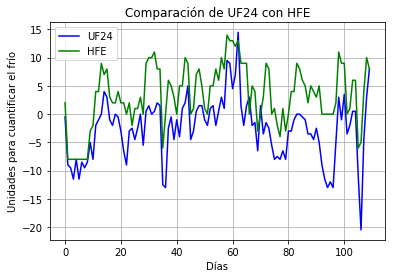

In [33]:
#Realizamos una gráfica que muestre la evolución temperatura máxima y mínima diaria
X = DIAS                 #Eje X
N = np.arange(len(DIAS)) #Longitud del arreglo de datos
Y1 = uf24DIAS            #Valores a graficar en eje Y (1)
Y2 = HFE                 #Valores a graficar en eje Y (2)

plt.plot(Y1, label="UF24", color = 'b')  #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Días")                                      #Nombre del eje X
plt.ylabel("Unidades para cuantificar el frío")         #Nombre del eje Y

plt.plot(Y2, label="HFE", color = 'g')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                            #Leyenda
plt.grid()                                #Marca los ejes del fondo
plt.title('Comparación de UF24 con HFE')  #Título de la gráfica
plt.savefig('comparacion',plt=2000)                       #Guardamos la gráfica como una imágen
plt.show()                                              #Mostramos la gráfica

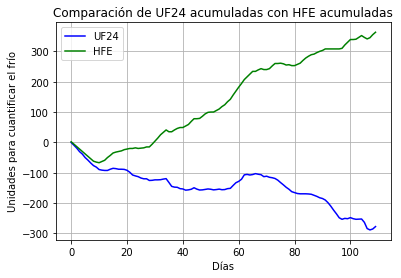

In [34]:
#Realizamos una gráfica que muestre la evolución temperatura máxima y mínima diaria
X = DIAS                 #Eje X
N = np.arange(len(DIAS)) #Longitud del arreglo de datos
Y1 = uf24tot            #Valores a graficar en eje Y (1)
Y2 = HFEtot                 #Valores a graficar en eje Y (2)

plt.plot(Y1, label="UF24", color = 'b')  #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Días")                                      #Nombre del eje X
plt.ylabel("Unidades para cuantificar el frío")         #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="HFE", color = 'g')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                            #Leyenda
plt.title('Comparación de UF24 acumuladas con HFE acumuladas')  #Título de la gráfica
plt.savefig('comp_acumuladas',plt=2000)                       #Guardamos la gráfica como una imágen
plt.show()                                              #Mostramos la gráfica